In [29]:
INPUTFILE = 'input-9.txt'

import numpy as np

with open(INPUTFILE, 'r') as file:
    input = file.read()
rows = input.split("\n")

In [30]:
def update(head:list, tail:list, direction:str):
  if direction == "R":
    head[0] += 1
    if head[0] - tail[0] > 1:
      tail[0] += 1
      tail[1] = head[1]
  elif direction == "L":
    head[0] -= 1
    if tail[0] - head[0] > 1:
      tail[0] -= 1
      tail[1] = head[1]
  elif direction == "U":
    head[1] += 1
    if head[1] - tail[1] > 1:
      tail[1] += 1
      tail[0] = head[0]
  elif direction == "D":
    head[1] -= 1
    if tail[1] - head[1] > 1:
      tail[1] -= 1
      tail[0] = head[0]
  return head, tail

In [39]:
head_position = [0,0]
tail_position = [0,0]
visited_positions = set()

for row in rows:
  command = row.split(" ")
  for _ in range(int(command[1])):
    head_position, tail_position = update(head_position, tail_position, command[0])
    visited_positions.add(tuple(tail_position))

print(len(visited_positions))

6067


In [42]:
import numpy as np

def update_head(head:list, direction:str):
  if direction == "R":
    head[0] += 1
  elif direction == "L":
    head[0] -= 1
  elif direction == "U":
    head[1] += 1
  elif direction == "D":
    head[1] -= 1
  return head

def update_tail(head:list, tail:list):
  for xy in range(2):
    if abs(head[xy]-tail[xy]) > 1:
      tail[xy] = tail[xy] + np.sign(head[xy] - tail[xy])
      tail[(xy+1)%2] = head[(xy+1)%2]
  return tail

In [43]:
snake = [[0,0] for _ in range(10)]

visited_positions = set()

for row in rows:
  command = row.split(" ")
  for _ in range(int(command[1])):
    snake[0] = update_head(snake[0], command[0])
    for i in range(1,len(snake)):
      snake[i] = update_tail(snake[i-1], snake[i])
    visited_positions.add(tuple(snake[-1]))

print(len(visited_positions))

2491


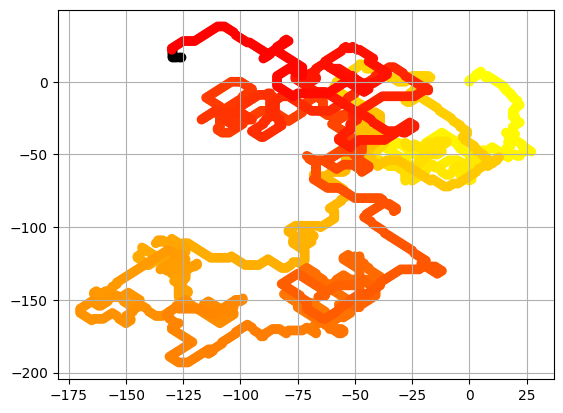

In [35]:
from matplotlib import pyplot as plt

plotsnake = np.array(snake)
plotvisited = np.array(visited_positions)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(plotsnake[:,0], plotsnake[:,1], c='k')
ax.scatter(plotvisited[:,0], plotvisited[:,1],
  c=range(len(visited_positions)), cmap="autumn_r")
minor_ticks = np.arange(-10, 15, 1)
#ax.set_xticks(minor_ticks, minor=True)
#ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='both')
#plt.axis([-15,15,-10,20])

In [ ]:
tested: 2662, 2491